In [3]:
#Importing libraries
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [4]:
# Reading the csv file
Data = pd.read_csv('titanic-passengers-Clean.csv')

In [5]:
# First 5 rows of the dataset
Data.head()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,C,Q,S
0,0,0,2,28.0,0,0,13.0000,1,0,0,1
1,1,0,3,25.0,0,0,7.6500,1,0,0,1
2,2,0,3,20.0,0,0,7.8542,1,0,0,1
3,3,0,3,29.0,0,4,21.0750,0,0,0,1
4,4,0,1,31.0,1,0,52.0000,1,0,0,1


In [6]:
# Dropping unknown column
Data = Data.drop(['Unnamed: 0'], axis = 1)

In [7]:
# The dataset after cleaning
Data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,C,Q,S
0,0,2,28.0,0,0,13.0000,1,0,0,1
1,0,3,25.0,0,0,7.6500,1,0,0,1
2,0,3,20.0,0,0,7.8542,1,0,0,1
3,0,3,29.0,0,4,21.0750,0,0,0,1
4,0,1,31.0,1,0,52.0000,1,0,0,1


In [8]:
Data['Survived'].value_counts() # Number of survived and unsurvived passengers

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

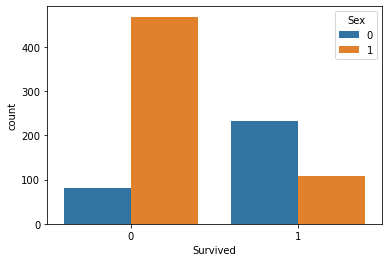

In [9]:
sns.countplot(x = 'Survived', data = Data, hue = 'Sex')

## Logistic regression stage

In [10]:
# Features selection
Data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,C,Q,S
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153,0.032024,-0.013855,-0.027121
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
Sex,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
C,0.168240,-0.243292,0.032024,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Q,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624
S,-0.155660,0.081720,-0.027121,0.070941,0.063036,-0.166603,0.125722,-0.778359,-0.496624,1.000000


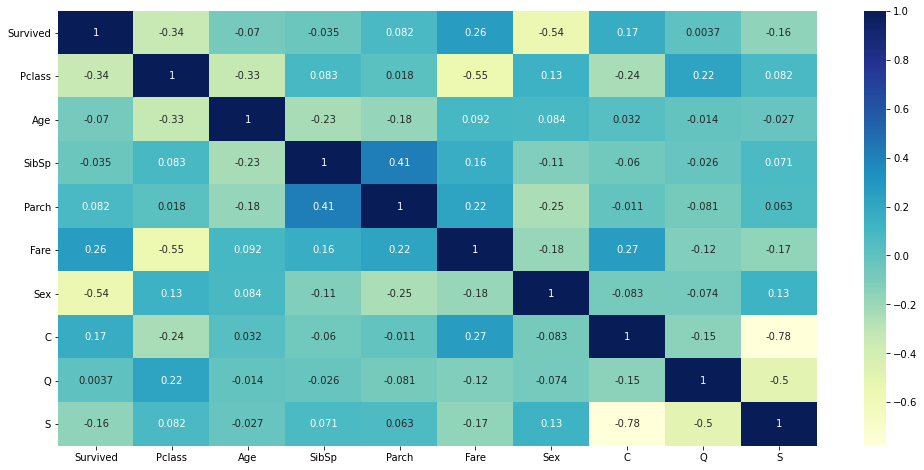

In [11]:
# Plotting the correlationg heat map
plt.figure(figsize = (17,8))
dataplot = sns.heatmap(Data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [12]:
X = Data.drop(['Survived','Fare'], axis = 1)
y = Data['Survived']

In [13]:
X

,Pclass,Age,SibSp,Parch,Sex,C,Q,S
0,2,28.000000,0,0,1,0,0,1
1,3,25.000000,0,0,1,0,0,1
2,3,20.000000,0,0,1,0,0,1
3,3,29.000000,0,4,0,0,0,1
4,1,31.000000,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,2,14.000000,1,0,0,1,0,0
887,3,22.000000,0,0,1,1,0,0
888,3,30.000000,0,0,0,0,0,1
889,3,29.699118,0,0,1,0,0,1


In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
886    1
887    0
888    0
889    0
890    1
Name: Survived, Length: 891, dtype: int64

In [15]:
# Splitting the data into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)  

In [16]:
Model = LogisticRegression(max_iter = 5000)   # Building our logistic regression model

In [17]:
Model.fit(X_train, y_train)  # Fitting training data

LogisticRegression(max_iter=5000)

In [18]:
Predicted  = Model.predict(X_test)    # Testing model’s performance

In [19]:
Predicted

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [20]:
y_test.values

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0], dtype=int64)

## Confusion matrix

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test, Predicted))
print("Precision:",metrics.precision_score(y_test, Predicted))

Accuracy: 0.8385650224215246
Precision: 0.8028169014084507


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

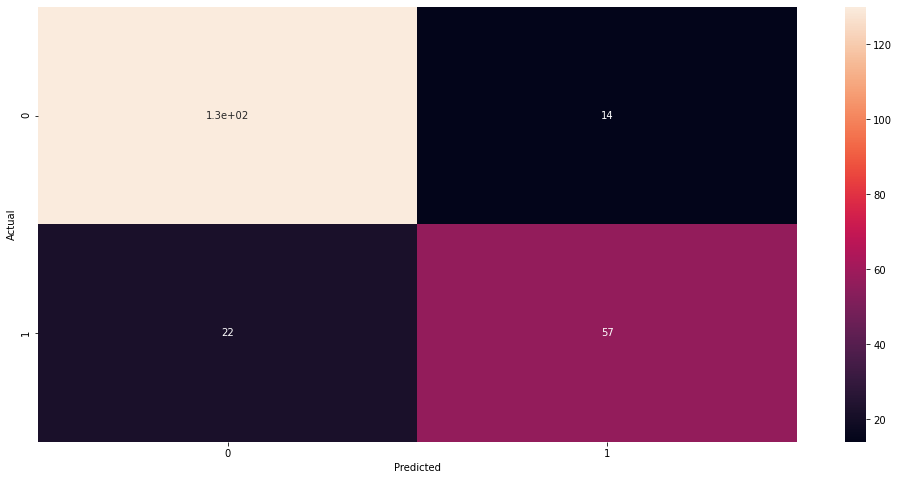

In [22]:
plt.figure(figsize = (17,8))
confusion_matrix = pd.crosstab(y_test, Predicted, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

## AUC / ROC Curve


AUC -> Area under the receiving operating curve
, ROC -> Recevier operating characteristics

It is one of the most important evaluation metrics for checking any classification model's performance


In [24]:
probs = Model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

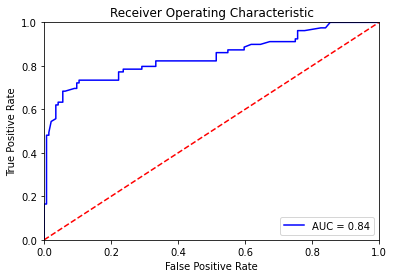

In [25]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()